In [1]:
#Import all the Packages and data set; define the variables and the response variable.

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *


data= pd.read_csv("forestClass.csv")
X = data.iloc[:,0:10]
y = data.iloc[:,-1]




In [2]:
#name the columns
data.columns = ['Elevation','Aspect','Slope','H_D_Hydro','V_D_Hydro','H_D_Road','Hillshade_9am','Hillshade_12','Hillshade_3pm','H_D_Fire','labels']


In [458]:
#split into test, training and validation 

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.5, random_state=2) #creates a 50% for testing

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.4, random_state=2) # from the 50% extract the 20% ~0.2 / 0.5 = 0.4; test_size=validation in this case~

In [459]:
#classifier

clf = GaussianNB ()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [460]:
#set the predicted

y_predict = clf.predict(X_test)

In [461]:
#print the report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.63      0.67      0.65    106137
           2       0.72      0.65      0.69    141656
           3       0.50      0.64      0.56     17825
           4       0.39      0.46      0.42      1332
           5       0.17      0.23      0.20      4675
           6       0.33      0.31      0.32      8672
           7       0.27      0.29      0.28     10209

    accuracy                           0.63    290506
   macro avg       0.43      0.47      0.45    290506
weighted avg       0.64      0.63      0.63    290506



In [462]:
#print the confusion matrix

cm = confusion_matrix(y_test, y_predict)
print(cm)

[[71453 26563   714     0  1205   283  5919]
 [34449 92348  5990    18  4013  2853  1985]
 [    0  3570 11435   685    67  2068     0]
 [    0     0   512   619     0   201     0]
 [    4  3374   109     0  1094    94     0]
 [    0  1511  4108   267    63  2723     0]
 [ 7181    50    60     0     2     0  2916]]


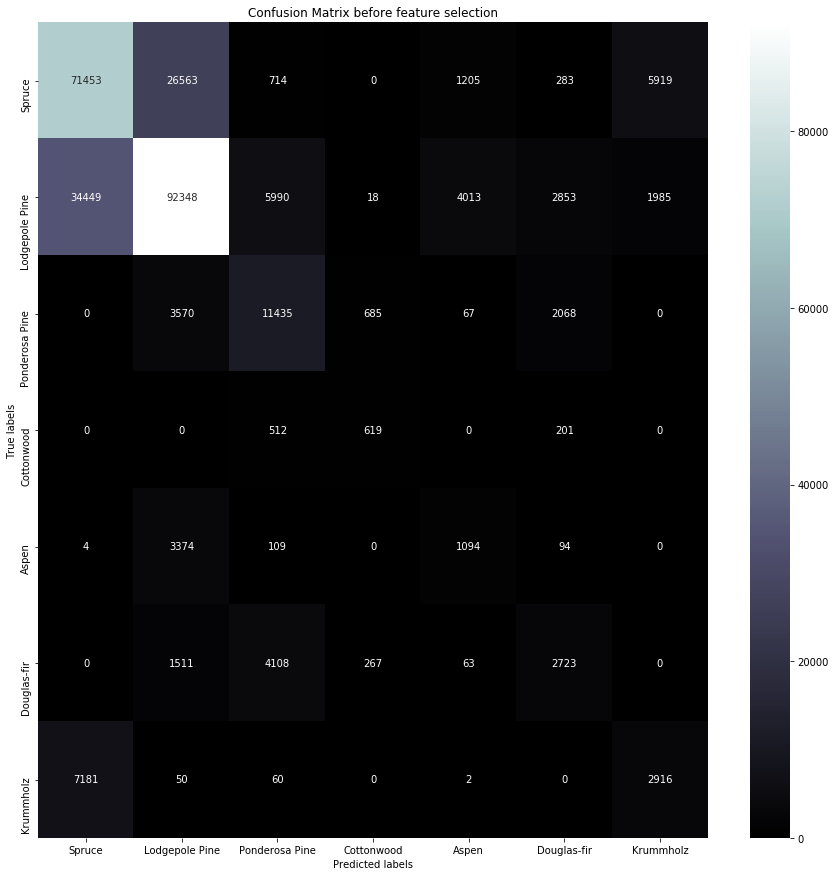

In [463]:
plt.figure(figsize=(15, 15))
ax= plt.subplot()

sns.heatmap(cm, annot=True,  cmap= 'bone', fmt = '.5g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix before feature selection'); 
ax.xaxis.set_ticklabels(['Spruce', 'Lodgepole Pine','Ponderosa Pine','Cottonwood','Aspen','Douglas-fir','Krummholz']); 
ax.yaxis.set_ticklabels(['Spruce', 'Lodgepole Pine','Ponderosa Pine','Cottonwood','Aspen','Douglas-fir','Krummholz']);

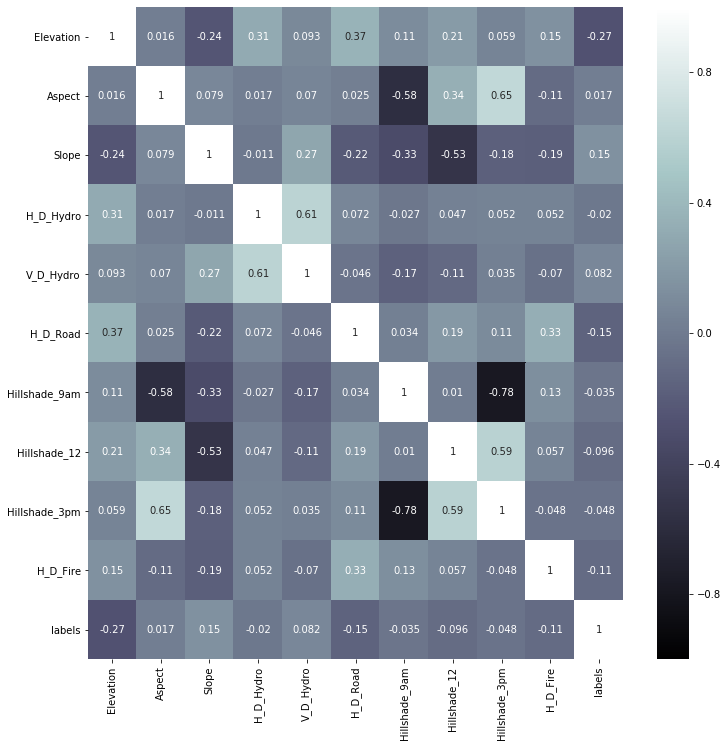

In [464]:
#to test the performance after remove some features

# selecting the less correlated elements 

plt.figure(figsize=(12, 12))
dcor=data.corr()
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'bone')
plt.show()

In [465]:
#Correlation with output variable
cor_target = abs(dcor['labels'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.10]
relevant_features

Elevation    0.269550
Slope        0.148292
H_D_Road     0.153446
H_D_Fire     0.108949
labels       1.000000
Name: labels, dtype: float64

In [466]:
#check the correlation among features 
print(data[['Elevation','Slope','H_D_Road','H_D_Fire']].corr())


           Elevation     Slope  H_D_Road  H_D_Fire
Elevation   1.000000 -0.242701  0.365558  0.148030
Slope      -0.242701  1.000000 -0.215918 -0.185656
H_D_Road    0.365558 -0.215918  1.000000  0.331590
H_D_Fire    0.148030 -0.185656  0.331590  1.000000


In [467]:
#check the name of the columns
data.columns

Index(['Elevation', 'Aspect', 'Slope', 'H_D_Hydro', 'V_D_Hydro', 'H_D_Road',
       'Hillshade_9am', 'Hillshade_12', 'Hillshade_3pm', 'H_D_Fire', 'labels'],
      dtype='object')

In [468]:
#drop the non selected features
data2=data.drop(['Aspect',  'H_D_Hydro', 'H_D_Hydro', 'V_D_Hydro','Hillshade_9am', 'Hillshade_12', 'Hillshade_3pm'], axis =1)

data2.columns

Index(['Elevation', 'Slope', 'H_D_Road', 'H_D_Fire', 'labels'], dtype='object')

In [469]:
X2 = data2.iloc[:,0:4]
y2 = data2.iloc[:,-1]



In [470]:
#split into test, training and validation 

X2_train, X2_test, y2_train, y2_test  = train_test_split(X2, y2, test_size=0.5, random_state=2) #creates a 50% for testing

X2_train, X2_val, y2_train, y2_val  = train_test_split(X2_train, y2_train, test_size=0.4, random_state=2) # from the 50% extract the 20% ~0.2 / 0.5 = 0.4; test_size=validation in this case~

In [471]:
#classifier

clf = GaussianNB ()
clf.fit(X2_train,y2_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [472]:
#just to check the number of features 
X2_train.shape


(174303, 4)

In [473]:
#set the predicted

y2_predict = clf.predict(X2_test)

In [474]:
#print the report
print(classification_report(y2_test,y2_predict))

/Users/luciananieto/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.62      0.71      0.66    106137
           2       0.72      0.67      0.70    141656
           3       0.46      0.85      0.60     17825
           4       0.00      0.00      0.00      1332
           5       0.19      0.02      0.04      4675
           6       0.33      0.01      0.01      8672
           7       0.34      0.08      0.13     10209

    accuracy                           0.64    290506
   macro avg       0.38      0.33      0.31    290506
weighted avg       0.63      0.64      0.62    290506



In [475]:
#Calculate and print the confusion matrix
cm2 = confusion_matrix(y2_test, y2_predict)
print(cm2)

[[75322 28947   209     0    31     0  1628]
 [37113 95582  8445     0   445    64     7]
 [    0  2670 15094     0     5    56     0]
 [    0     0  1332     0     0     0     0]
 [    0  4161   399     0   113     2     0]
 [    0  1495  7117     0     0    60     0]
 [ 9309    67     0     0     0     0   833]]


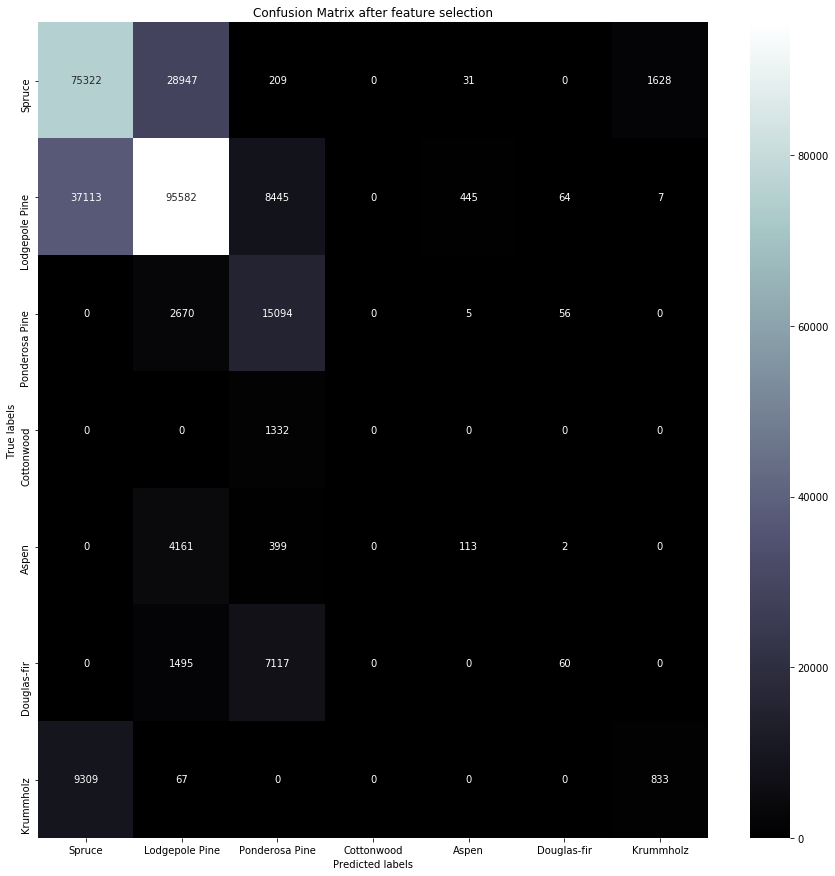

In [476]:


plt.figure(figsize=(15, 15))
ax= plt.subplot()

sns.heatmap(cm2, annot=True,  cmap= 'bone', fmt = '.6g', ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix after feature selection'); 
ax.xaxis.set_ticklabels(['Spruce', 'Lodgepole Pine','Ponderosa Pine','Cottonwood','Aspen','Douglas-fir','Krummholz']); 
ax.yaxis.set_ticklabels(['Spruce', 'Lodgepole Pine','Ponderosa Pine','Cottonwood','Aspen','Douglas-fir','Krummholz']);
